# Solar Energy Data Analysis
# --------------------------

# ## Introduction
# This notebook performs Exploratory Data Analysis (EDA) on solar energy data. 
# We will cover the following steps:
# 1. Load and clean the data.
# 2. Perform summary statistics.
# 3. Check data quality (missing values, outliers, incorrect entries).
# 4. Conduct time series analysis.
# 5. Explore correlations between variables.
# 6. Analyze wind data and temperature.
# 7. Visualize data distributions and relationships.
# 8. Clean data based on initial findings.

# ## 1. Load and Clean Data

In [27]:
import pandas as pd
import numpy as np
import matplotlib as plt
def load_data(file_path):
    data = pd.read_csv(file_path, parse_dates=['Timestamp'])
    return data
data = load_data('../data/sierraleone-bumbuna.csv')
print(data.head())


            Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0 2021-10-30 00:01:00 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.1  0.0     0.0   
1 2021-10-30 00:02:00 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
2 2021-10-30 00:03:00 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
3 2021-10-30 00:04:00 -0.7  0.0 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   
4 2021-10-30 00:05:00 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   

   WSstdev   WD  WDstdev    BP  Cleaning  Precipitation  TModA  TModB  \
0      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
1      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
2      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
3      0.0  0.0      0.0  1002         0            0.1   22.3   22.6   
4      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  


In [28]:
def handle_missing_values(df):
    # Forward fill for most columns
    df = df.ffill()
    # If any remaining NaNs exist, fill with median values (especially useful for the first row)
    df.fillna(df.median(), inplace=True)
    return df
# Handle missing values
df = handle_missing_values(data)

C:\Users\hp\AppData\Local\Temp\ipykernel_13448\3272454640.py:5: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.fillna(df.median(), inplace=True)


In [29]:

def handle_negative_values(df, columns):
    for column in columns:
        df[column] = df[column].apply(lambda x: np.nan if x < 0 else x)  
    # Re-apply missing value handling to take care of new NaNs
    df = handle_missing_values(df) 
    return df
# Handle negative values for specific columns
df = handle_negative_values(df, ['GHI', 'DNI', 'DHI'])

C:\Users\hp\AppData\Local\Temp\ipykernel_13448\3272454640.py:5: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.fillna(df.median(), inplace=True)


# ## 2. Summary Statistics
# 
# Summary statistics provide an overview of the distribution of the data.

# Summary statistics

In [30]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      525600 non-null  datetime64[ns]
 1   GHI            525600 non-null  float64       
 2   DNI            525600 non-null  float64       
 3   DHI            525600 non-null  float64       
 4   ModA           525600 non-null  float64       
 5   ModB           525600 non-null  float64       
 6   Tamb           525600 non-null  float64       
 7   RH             525600 non-null  float64       
 8   WS             525600 non-null  float64       
 9   WSgust         525600 non-null  float64       
 10  WSstdev        525600 non-null  float64       
 11  WD             525600 non-null  float64       
 12  WDstdev        525600 non-null  float64       
 13  BP             525600 non-null  int64         
 14  Cleaning       525600 non-null  int64         
 15  

In [31]:
print(data.describe())

                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      201.957515     116.376337     113.720571     206.643095   
std       298.495150     218.652659     158.946032     300.896893   
min       -19.500000      -7.800000     -17.900000       0.000000   
25%        -2.800000      -0.300000      -3.800000       0.000000   
50%         0.300000      -0.100000      -0.100000       3.600000   
75%       362.400000     107.000000     224.700000     359.500000   
max      1499.000000     946.000000     892.000000    1507.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      198.114691      26.319394      79.448857       1.146113   
std       288.889073       4.398605      20.520775       1.239248   
min         0.000000      12.300000       9.900000       0.000000   
25%         0.000000      23.1000

In [34]:

# Replace negative values in each column
data['GHI'] = data['GHI'].clip(lower=0)
data['DNI'] = data['DNI'].clip(lower=0)
data['DHI'] = data['DHI'].clip(lower=0)
data['WS'] = data['WS'].clip(lower=0)
data['Tamb'] = data['Tamb'].where(data['Tamb'] >= 0, 200)  # Replace with minimum system temperature
data['RH'] = data['RH'].clip(lower=0, upper=100)
data['Precipitation'] = data['Precipitation'].clip(lower=0)
data['Cleaning'] = data['Cleaning'].apply(lambda x: max(x, 0))  # Replace with nearest positive integer
data['Comments'] = data['Comments'].apply(lambda x: 0.01 if x < 0 else x)
data.drop('Comments', axis=1, inplace=True)
print(data.describe())


                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      204.406778     116.523731     116.273677     206.643095   
std       296.787520     218.573992     157.020868     300.896893   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.300000       0.000000       0.000000       3.600000   
75%       362.400000     107.000000     224.700000     359.500000   
max      1499.000000     946.000000     892.000000    1507.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      198.114691      26.319394      79.448857       1.146113   
std       288.889073       4.398605      20.520775       1.239248   
min         0.000000      12.300000       9.900000       0.000000   
25%         0.000000      23.1000

In [6]:
# ## 3. Data Quality Check
# 
# Check for missing values, negative values, and outliers in the dataset.

# Check for missing values and negative values

# ## 3. Data Quality Check
# 
# Check for missing values, negative values, and outliers in the dataset.

# Check for missing values and negative values

            Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0 2021-10-25 00:01:00 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
1 2021-10-25 00:02:00 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2 2021-10-25 00:03:00 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
3 2021-10-25 00:04:00 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
4 2021-10-25 00:05:00 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.4  227.6      1.1  977         0            0.0   24.7   24.4   
1      0.4  229.3      0.7  977         0            0.0   24.7   24.4   
2      0.3  228.5      2.9  977         0            0.0   24.7   24.4   
3      0.3  229.1      4.6  977         0            0.0   24.7   24.4   
4      0.4  227.5      1.6  977         0            0.0   24.7   24.4   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  


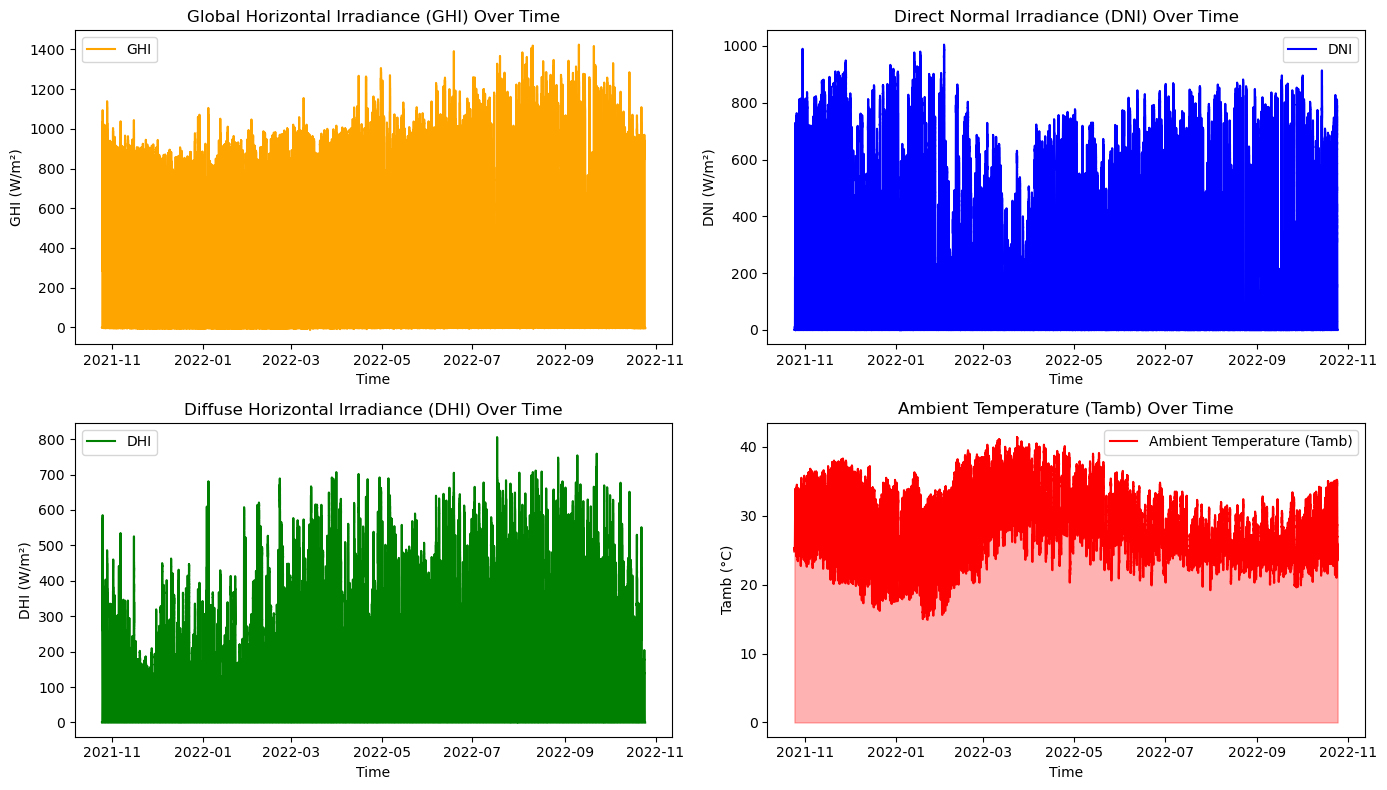

In [7]:
# Convert Timestamp to datetime
# Print the column names to check for the correct spelling and existence of 'Timestamp'
import matplotlib.pyplot as plt

def load_data(file_path):
    data = pd.read_csv(file_path)
    return data
df = load_data('../data/togo-dapaong_qc.csv')
print(data.head())

df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Set Timestamp as the index for time series analysis
df.set_index('Timestamp', inplace=True)

# Plotting the time series data
plt.figure(figsize=(14, 8))

# Plot GHI, DNI, DHI, and Tamb over time
plt.subplot(2, 2, 1)
plt.plot(df.index, df['GHI'], label='GHI', color='orange')
plt.fill_between(df.index, df['GHI'], color='orange', alpha=0.3)
plt.title('Global Horizontal Irradiance (GHI) Over Time')
plt.xlabel('Time')
plt.ylabel('GHI (W/m²)')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(df.index, df['DNI'], label='DNI', color='blue')
plt.fill_between(df.index, df['DNI'], color='blue', alpha=0.3)
plt.title('Direct Normal Irradiance (DNI) Over Time')
plt.xlabel('Time')
plt.ylabel('DNI (W/m²)')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(df.index, df['DHI'], label='DHI', color='green')
plt.fill_between(df.index, df['DHI'], color='green', alpha=0.3)
plt.title('Diffuse Horizontal Irradiance (DHI) Over Time')
plt.xlabel('Time')
plt.ylabel('DHI (W/m²)')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(df.index, df['Tamb'], label='Ambient Temperature (Tamb)', color='red')
plt.fill_between(df.index, df['Tamb'], color='red', alpha=0.3)
plt.title('Ambient Temperature (Tamb) Over Time')
plt.xlabel('Time')
plt.ylabel('Tamb (°C)')
plt.legend()

plt.tight_layout()
plt.show()


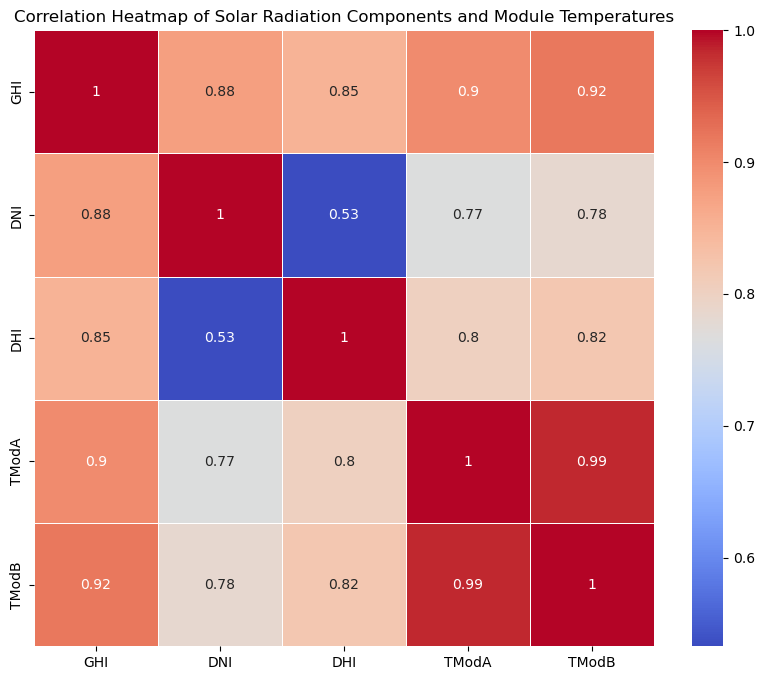

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Calculate the correlation matrix
corr_matrix = df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Solar Radiation Components and Module Temperatures')
plt.show()


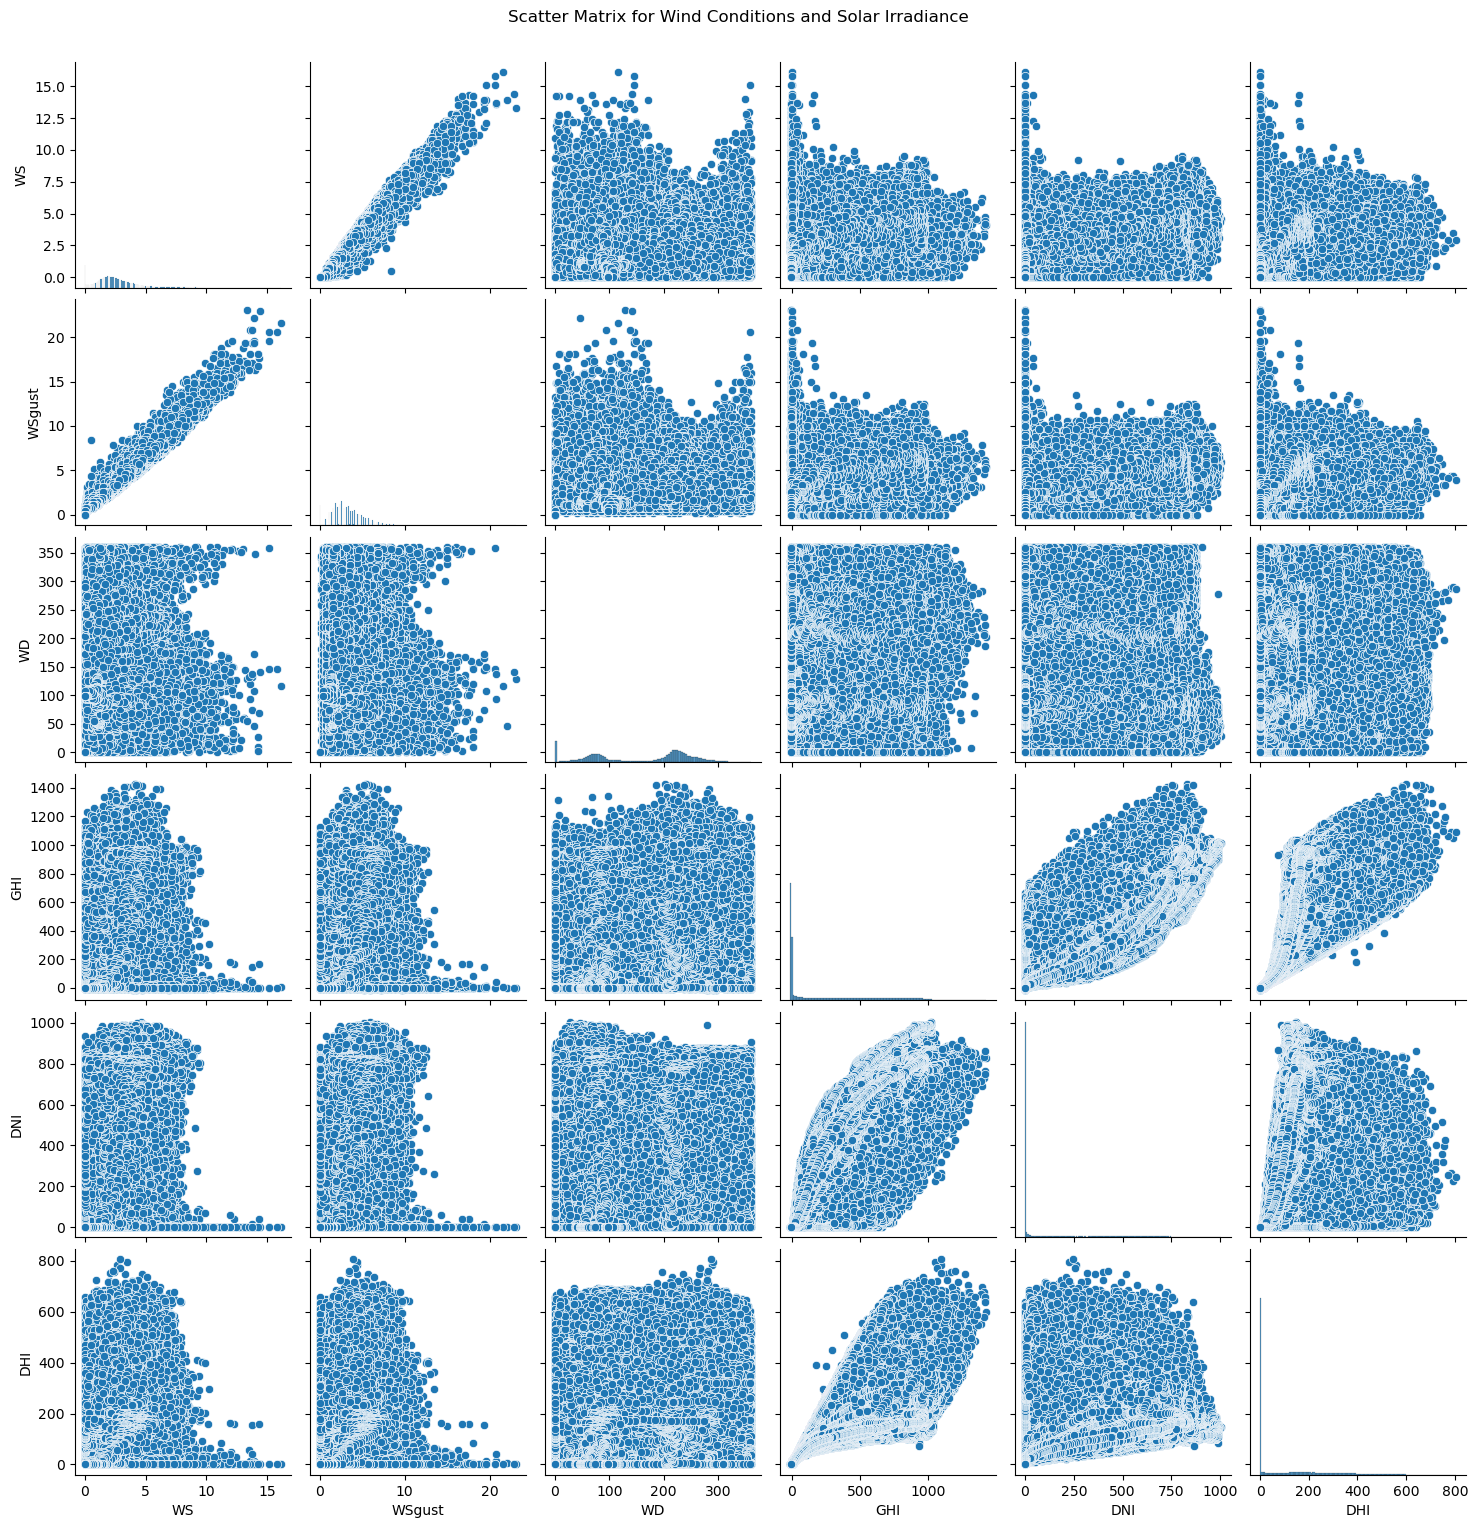

In [9]:
# Plotting scatter matrix (pair plot)
sns.pairplot(df[['WS', 'WSgust', 'WD', 'GHI', 'DNI', 'DHI']])
plt.suptitle('Scatter Matrix for Wind Conditions and Solar Irradiance', y=1.02)
plt.show()


wind analysis

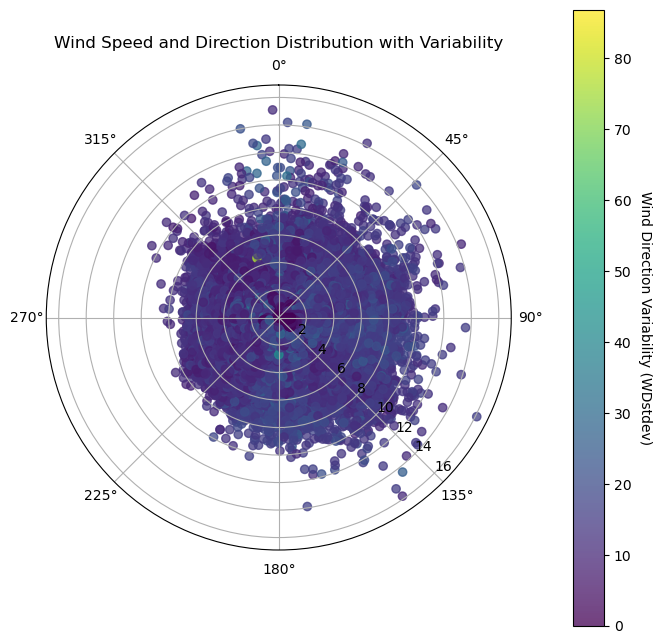

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your DataFrame with columns 'WD' (Wind Direction), 'WS' (Wind Speed), 'WDstdev' (Wind Direction Std Dev)

# Convert wind direction from degrees to radians for polar plot
wind_direction_radians = np.deg2rad(df['WD'])

# Create a polar plot
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection='polar')

# Plot wind speed against wind direction
sc = ax.scatter(wind_direction_radians, df['WS'], c=df['WDstdev'], cmap='viridis', alpha=0.75)

# Add a colorbar to represent wind direction variability
cbar = plt.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label('Wind Direction Variability (WDstdev)', rotation=270, labelpad=15)

# Add titles and labels
ax.set_title('Wind Speed and Direction Distribution with Variability', va='bottom')
ax.set_theta_zero_location('N')  # North is up
ax.set_theta_direction(-1)  # Clockwise direction
ax.set_rlabel_position(135)  # Position of radial labels

# Display the plot
plt.show()


tempreture analysis

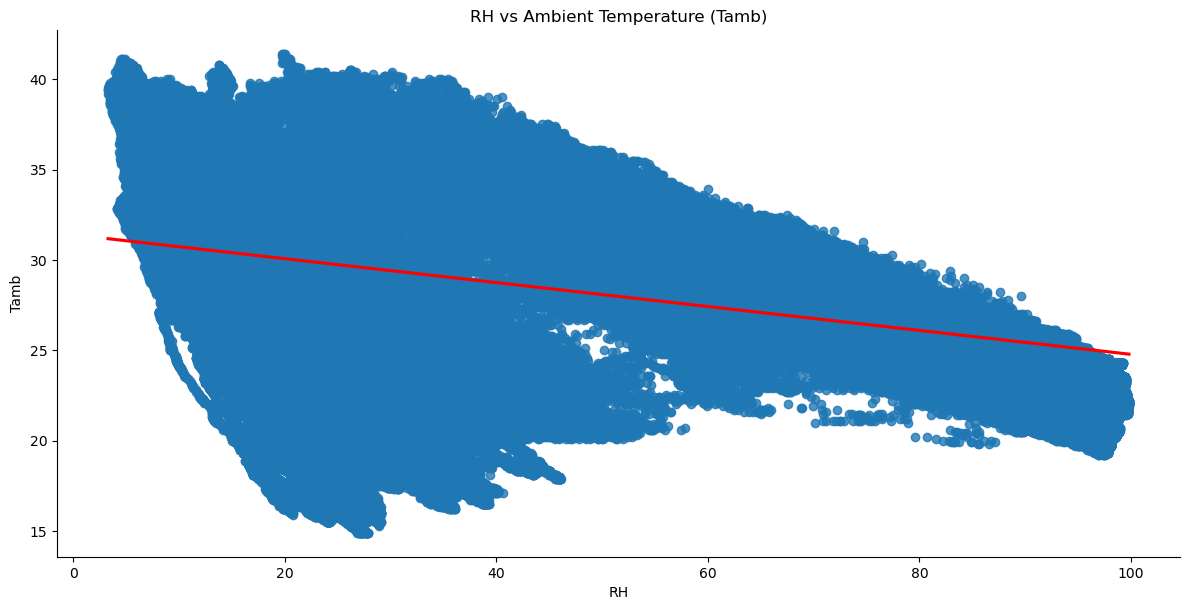

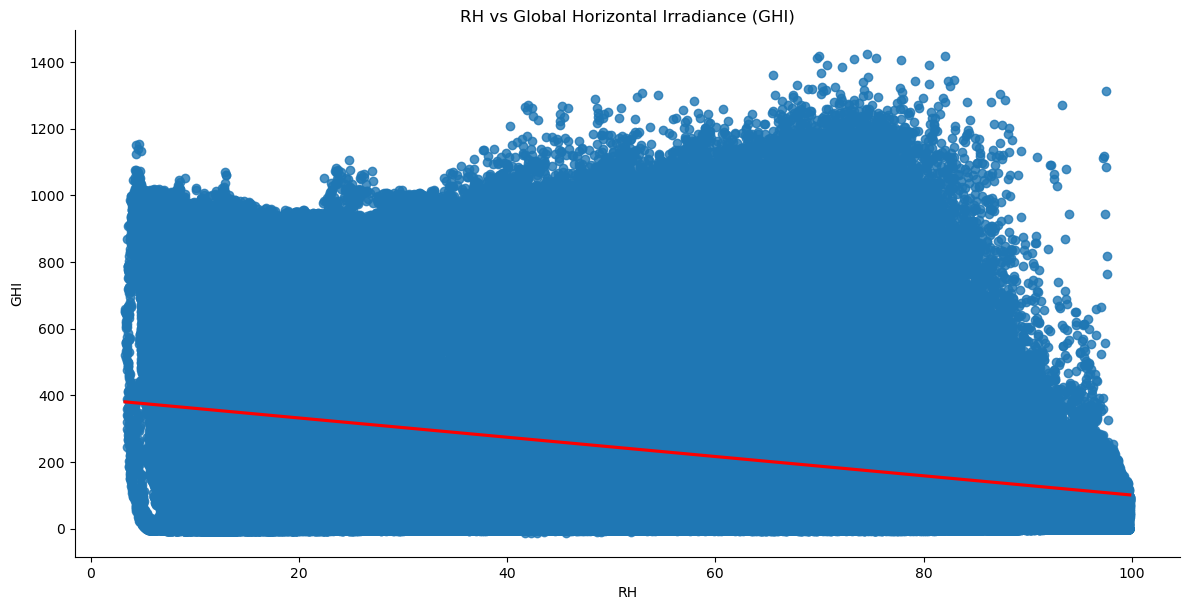

In [11]:
# Scatter plot of RH vs Tamb
sns.lmplot(x='RH', y='Tamb', data=df, aspect=2, height=6, line_kws={'color':'red'})
plt.title('RH vs Ambient Temperature (Tamb)')
plt.show()

# Scatter plot of RH vs GHI
sns.lmplot(x='RH', y='GHI', data=df, aspect=2, height=6, line_kws={'color':'red'})
plt.title('RH vs Global Horizontal Irradiance (GHI)')
plt.show()

tempreture analysis

In [12]:

def data_quality_check(df):
    missing_values = df.isnull().sum()
    negative_values = (df.select_dtypes(include=[np.number]) < 0).sum()
    return missing_values, negative_values

missing_values, negative_values = data_quality_check(df)

print("Missing Values:\n", missing_values)
print("\nNegative Values:\n", negative_values)
missing_values = data.isnull().sum()
print(missing_values)


Missing Values:
 GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

Negative Values:
 GHI              257385
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments              0
dtype: int64
Timestamp             0
GHI                   0
DNI                   0
DH

Histograms:

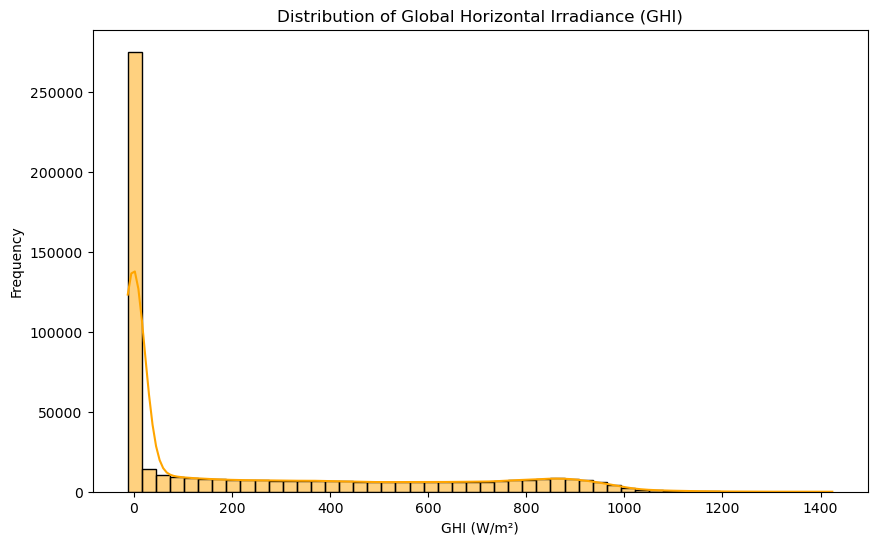

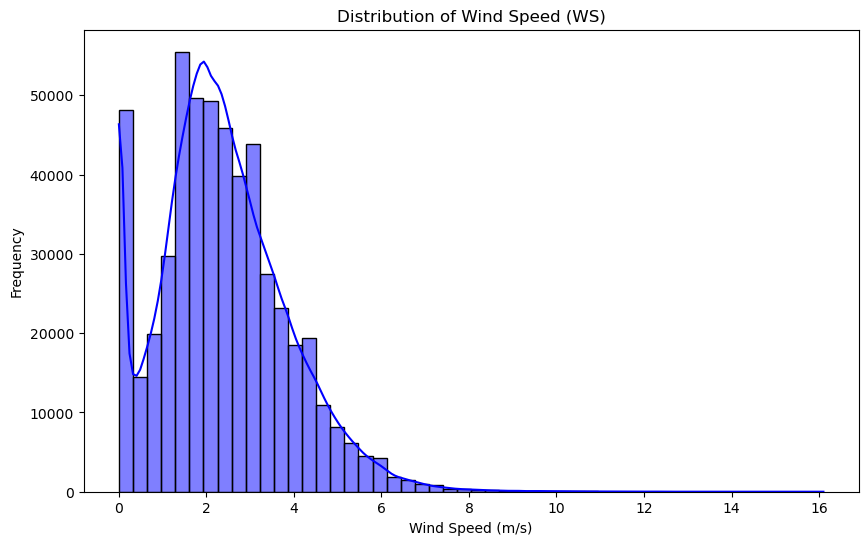

In [13]:
# Histogram for GHI
plt.figure(figsize=(10, 6))
sns.histplot(df['GHI'], bins=50, kde=True, color='orange')
plt.title('Distribution of Global Horizontal Irradiance (GHI)')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Frequency')
plt.show()

# Histogram for Wind Speed (WS)
plt.figure(figsize=(10, 6))
sns.histplot(df['WS'], bins=50, kde=True, color='blue')
plt.title('Distribution of Wind Speed (WS)')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')
plt.show()


Z score

In [14]:
from scipy.stats import zscore

# Calculate Z-scores
df['GHI_zscore'] = zscore(df['GHI'])
df['DNI_zscore'] = zscore(df['DNI'])
df['DHI_zscore'] = zscore(df['DHI'])
df['Tamb_zscore'] = zscore(df['Tamb'])

# Flagging outliers
outliers = df[(df['GHI_zscore'].abs() > 3) | (df['DNI_zscore'].abs() > 3) | (df['DHI_zscore'].abs() > 3) | (df['Tamb_zscore'].abs() > 3)]
print(outliers)


                       GHI    DNI    DHI   ModA   ModB  Tamb    RH   WS  \
Timestamp                                                                 
2021-10-30 11:01:00  934.0  989.8   84.9  977.9  951.0  30.2  64.5  3.3   
2021-11-21 10:53:00  893.0  905.5  138.3  976.6  939.0  34.0  19.1  3.5   
2021-11-21 11:03:00  904.0  906.1  140.7  986.8  949.0  34.4  18.5  3.9   
2021-11-21 11:04:00  905.0  907.7  140.9  988.9  951.0  34.4  18.9  2.8   
2021-11-21 11:05:00  907.0  907.4  142.0  989.9  953.0  34.5  18.3  3.3   
...                    ...    ...    ...    ...    ...   ...   ...  ...   
2022-10-14 11:54:00  709.5   63.7  629.8  703.1  694.9  30.2  66.6  3.5   
2022-10-14 11:55:00  677.8   40.6  621.7  670.1  662.2  30.2  66.7  2.8   
2022-10-14 11:56:00  659.5   29.7  614.9  651.0  643.4  30.3  66.1  4.1   
2022-10-14 11:57:00  660.1   40.7  605.6  653.2  645.6  30.2  66.0  3.7   
2022-10-14 11:58:00  655.8   50.2  591.0  647.5  639.9  30.2  66.2  3.4   

                     WSg

Bubble chart

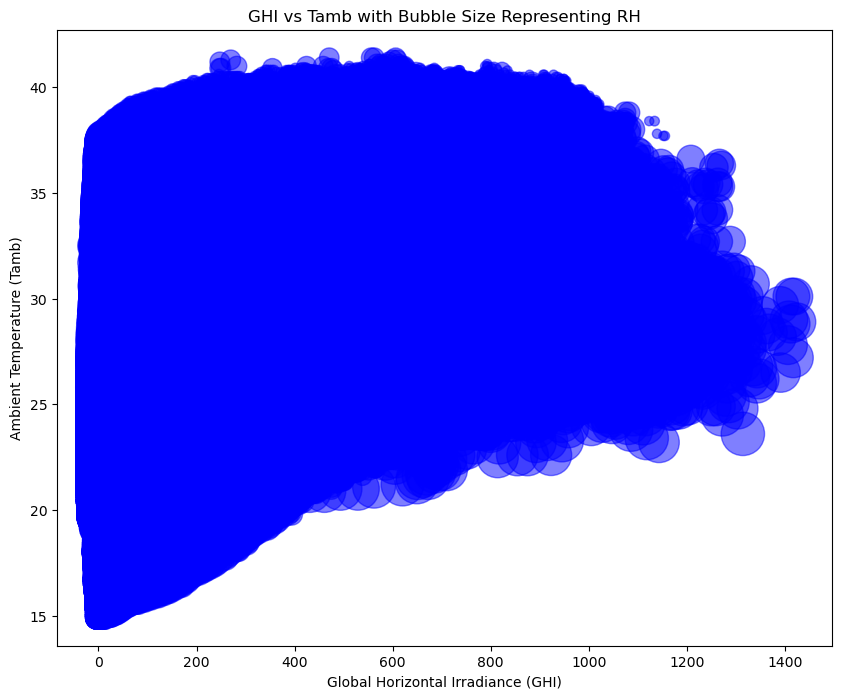

In [15]:
plt.figure(figsize=(10, 8))
plt.scatter(df['GHI'], df['Tamb'], s=df['RH']*10, alpha=0.5, c='blue')
plt.title('GHI vs Tamb with Bubble Size Representing RH')
plt.xlabel('Global Horizontal Irradiance (GHI)')
plt.ylabel('Ambient Temperature (Tamb)')
plt.show()


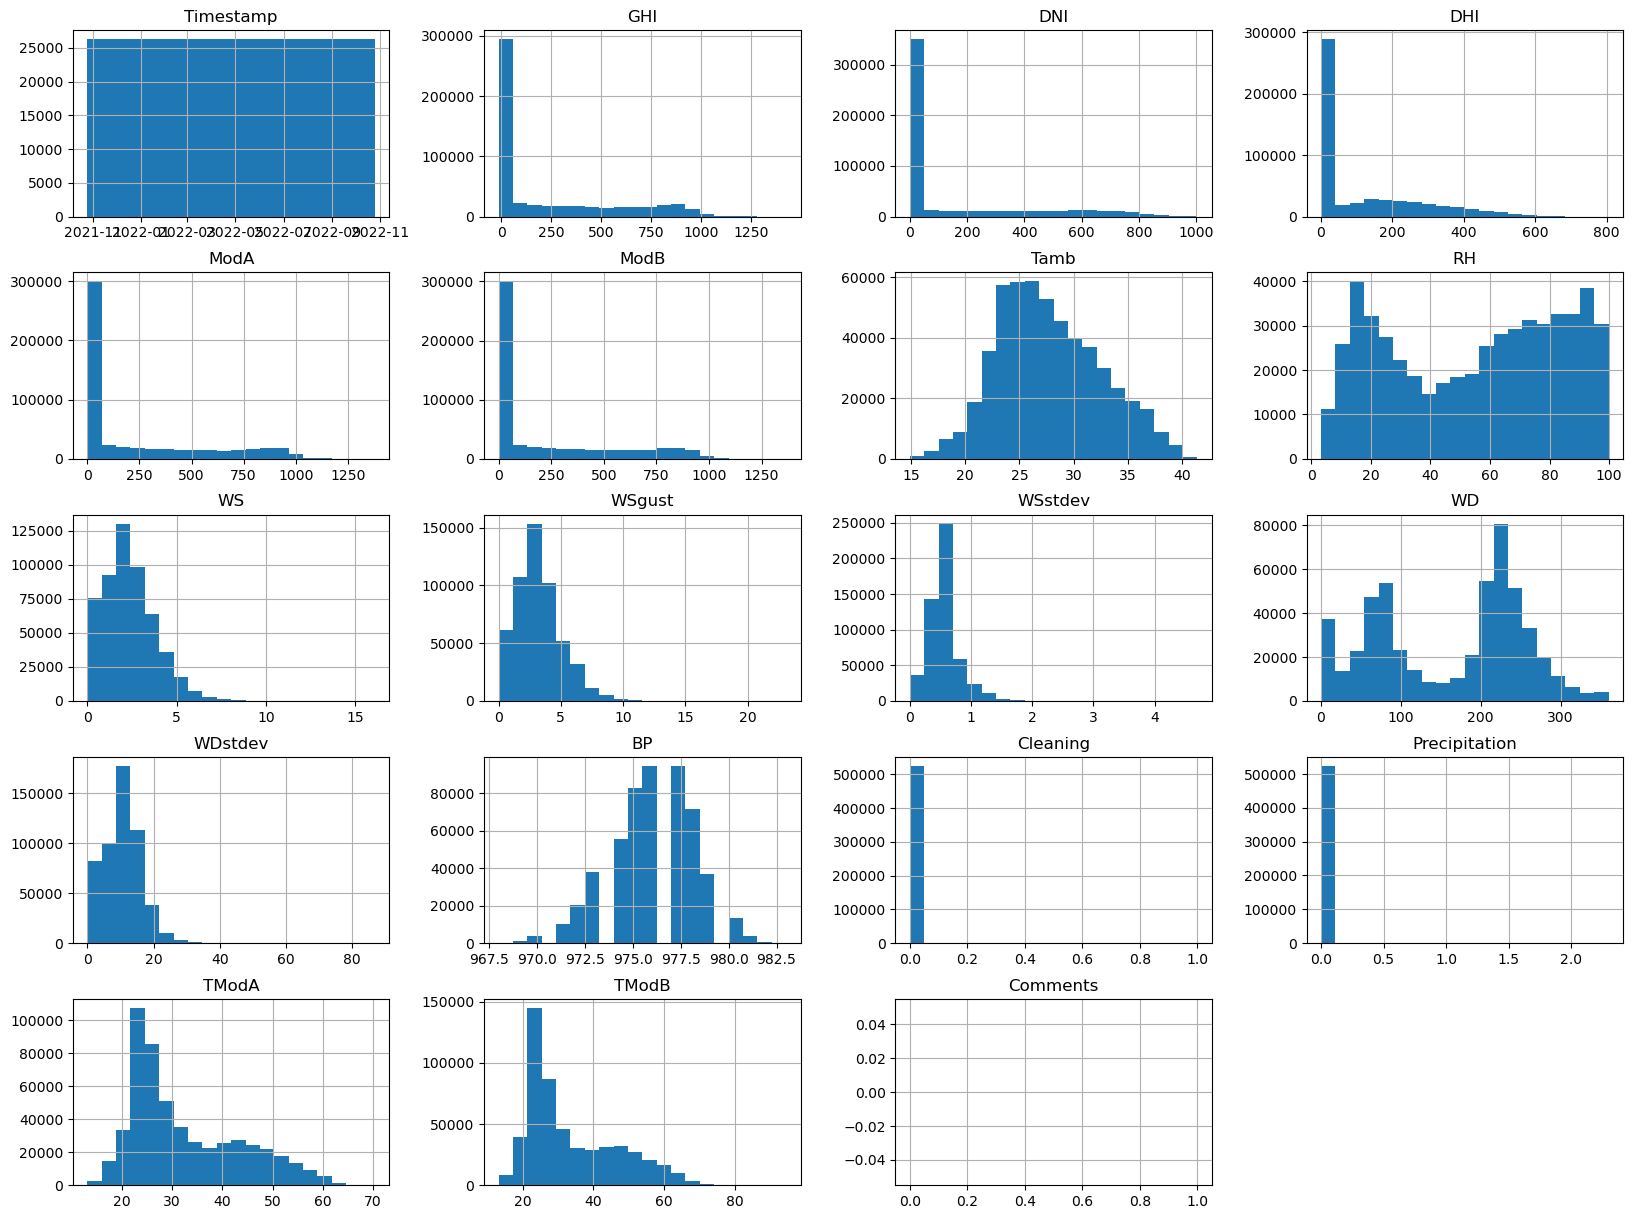

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
data.hist(bins=20, figsize=(20, 15))
plt.show()


In [17]:
summary_stats = data.describe()
print(summary_stats)


                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.555040     151.258469     116.444352     226.144375   
std       322.532347     250.956962     156.520714     317.346938   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%       442.400000     246.400000     215.700000     422.525000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      219.568588      27.751788      55.013160       2.368093   
std       307.932510       4.758023      28.778732       1.462668   
min         0.000000      14.900000       3.300000       0.000000   
25%         0.000000      24.2000

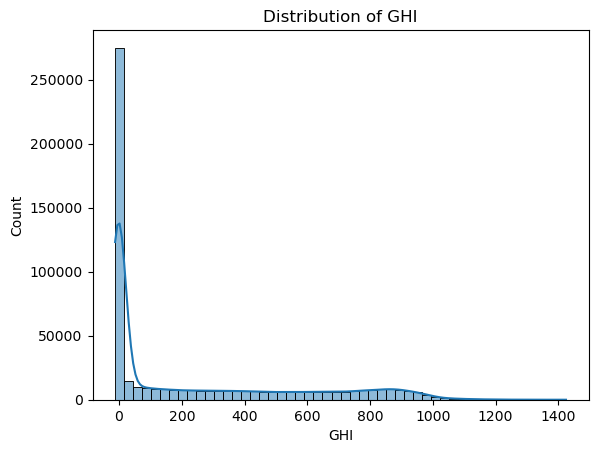

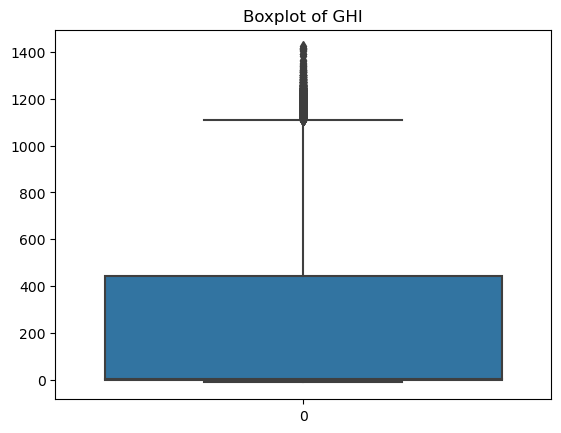

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data['GHI'], bins=50, kde=True)
plt.title('Distribution of GHI')
plt.show()

sns.boxplot(data['GHI'])
plt.title('Boxplot of GHI')
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_13448\2085088128.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


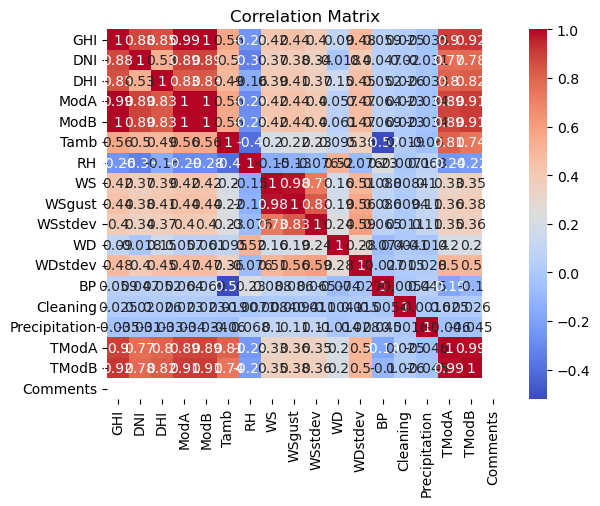

In [19]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


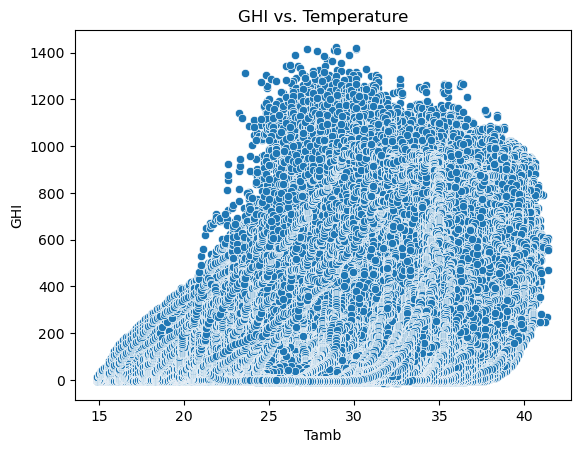

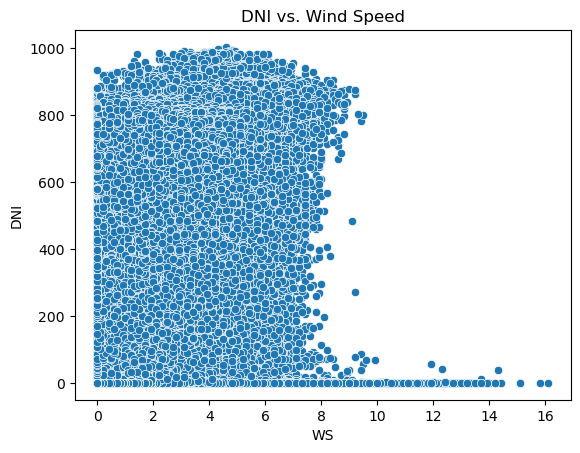

In [20]:
sns.scatterplot(x='Tamb', y='GHI', data=data)
plt.title('GHI vs. Temperature')
plt.show()

sns.scatterplot(x='WS', y='DNI', data=data)
plt.title('DNI vs. Wind Speed')
plt.show()


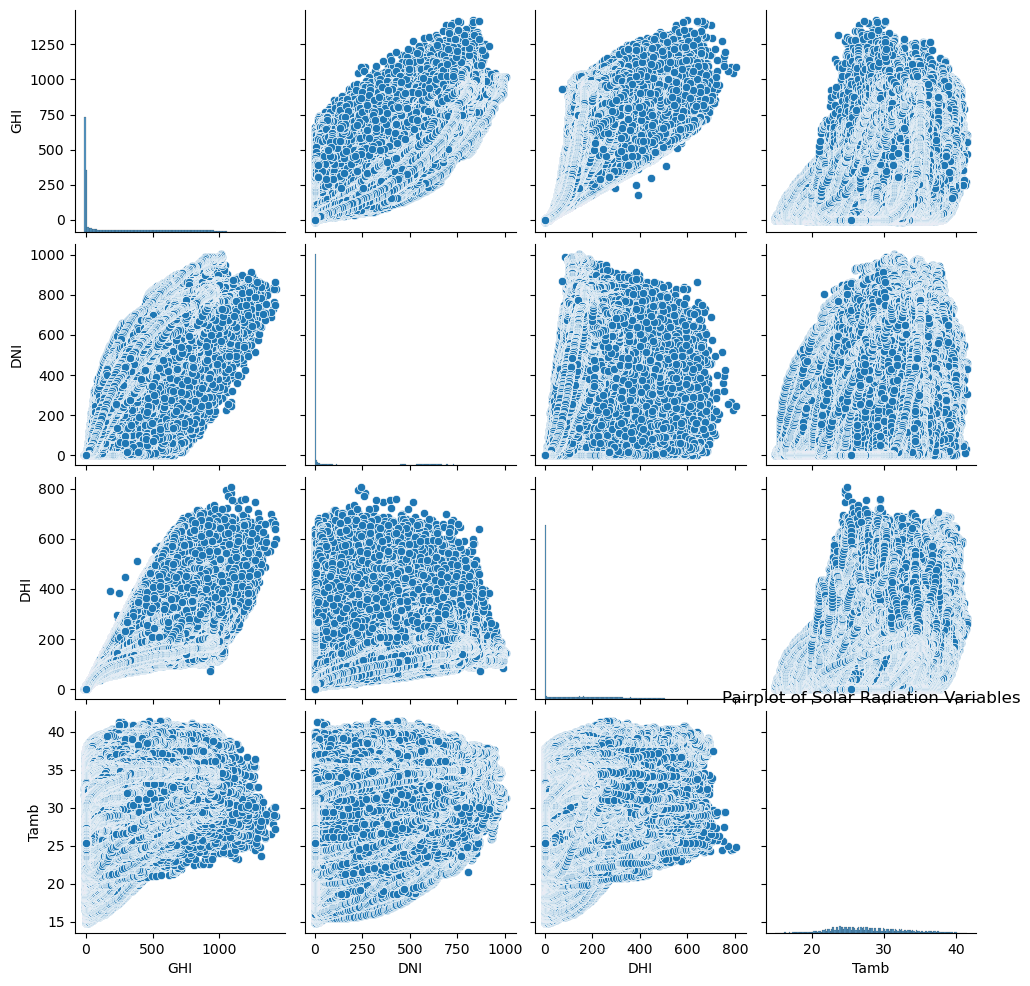

In [21]:
sns.pairplot(data[['GHI', 'DNI', 'DHI', 'Tamb']])
plt.title('Pairplot of Solar Radiation Variables')
plt.show()


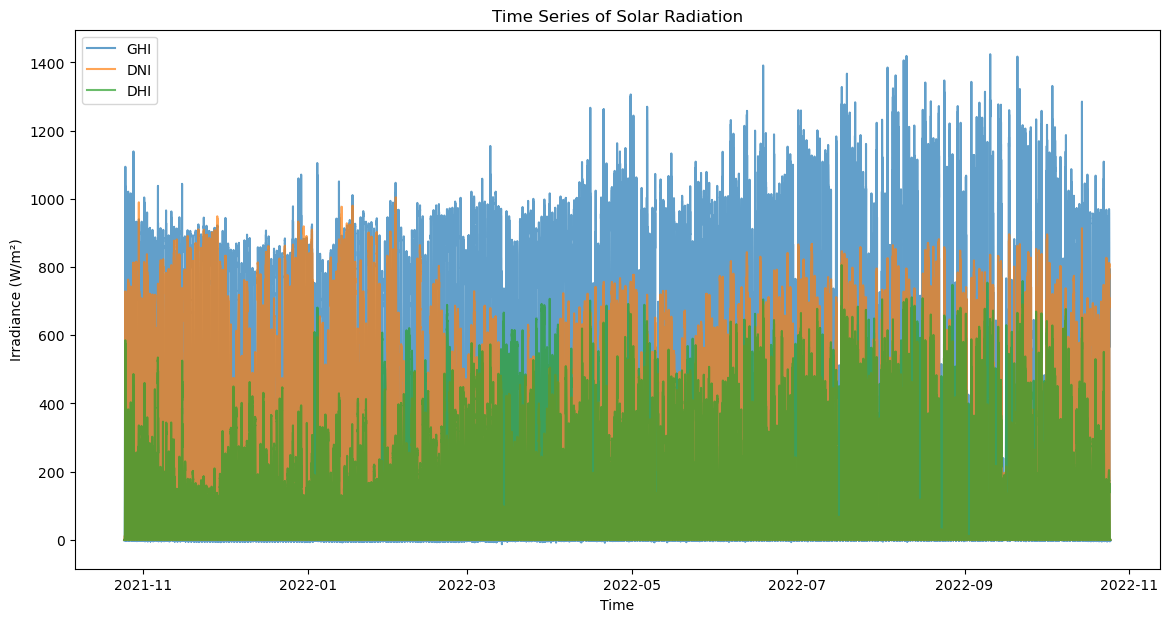

In [22]:
plt.figure(figsize=(14, 7))
plt.plot(data['Timestamp'], data['GHI'], label='GHI', alpha=0.7)
plt.plot(data['Timestamp'], data['DNI'], label='DNI', alpha=0.7)
plt.plot(data['Timestamp'], data['DHI'], label='DHI', alpha=0.7)
plt.xlabel('Time')
plt.ylabel('Irradiance (W/m²)')
plt.title('Time Series of Solar Radiation')
plt.legend()
plt.show()


In [23]:
sns.heatmap(data.pivot_table(index='Timestamp', columns='Time', values='GHI'))
plt.title('Heatmap of GHI Over Time')
plt.show()


KeyError: 'Time'

In [ ]:
from sklearn.decomposition import PCA

features = data[['GHI', 'DNI', 'DHI', 'Tamb']]
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features)
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.7)
plt.title('PCA Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [ ]:
sns.boxplot(x=data['GHI'])
plt.title('Boxplot for Outlier Detection in GHI')
plt.show()


In [ ]:
from scipy import stats
import numpy as np
z_scores = stats.zscore(data[['GHI', 'DNI', 'DHI']])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
clean_data = data[filtered_entries]


In [28]:
data.to_csv('../data/cleaned_dataset.csv', index=False)
